In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
bigMart = pd.read_csv('./Datasets/Train.csv')
bigMart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
bigMart.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
bigMart['Item_Weight'] = bigMart['Item_Weight'].fillna(bigMart['Item_Weight'].mean())

In [5]:
bigMart['Outlet_Size'] = bigMart['Outlet_Size'].fillna(method='ffill')

In [6]:
bigMart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
bigMart = bigMart.drop(columns=['Item_Identifier', 'Outlet_Identifier'])
bigMart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
bigMart.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
bigMart.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
bigMart.Outlet_Size.value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [11]:
bigMart.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
bigMart.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

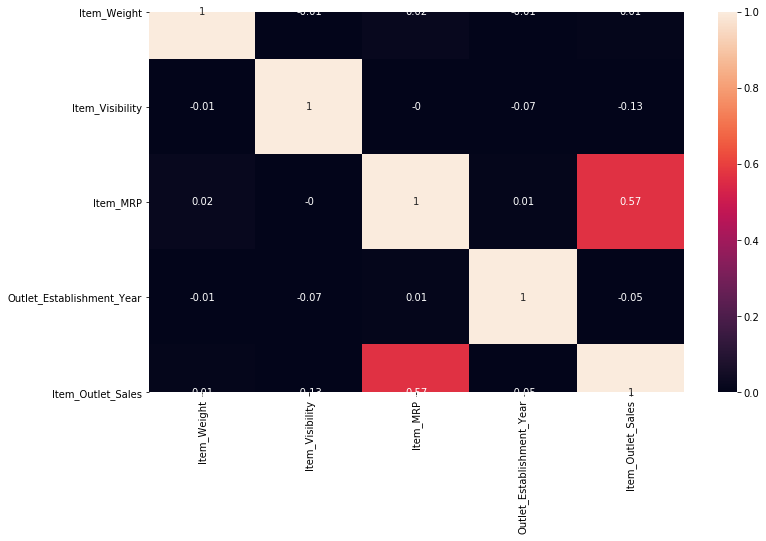

In [13]:
# Checking the correlation between the features
fig, ax = plt.subplots(figsize = (12,7))

corr_matrix = bigMart.corr().round(2)
sns.heatmap(data = corr_matrix , vmin = 0, vmax = 1, annot = True);


In [22]:
le = LabelEncoder()
bigMart['Item_Fat_Content'] = le.fit_transform(bigMart['Item_Fat_Content'])
bigMart['Item_Type'] = le.fit_transform(bigMart['Item_Type'])
bigMart['Outlet_Size'] = le.fit_transform(bigMart['Outlet_Size'])
bigMart['Outlet_Location_Type'] = le.fit_transform(bigMart['Outlet_Location_Type'])
bigMart['Outlet_Type'] = le.fit_transform(bigMart['Outlet_Type'])

In [23]:
bigMart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [24]:
X = bigMart.iloc[:,:-1]
Y = bigMart.iloc[:,-1]

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 7)

In [35]:
print("X_train ", X_train)
print("\n x_test ", X_test)
print("\n y_train ", Y_train)
print("\n y_test ", Y_test)

X_train        Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
1010    14.000000                 4         0.031267          3   51.4640   
7430    21.250000                 1         0.024694          9  144.1102   
7503    14.300000                 1         0.026300          5   79.4302   
3632    21.250000                 1         0.010039         10  181.7608   
6965    19.850000                 1         0.000000          8  126.1704   
...           ...               ...              ...        ...       ...   
1372    12.150000                 4         0.132831          6  190.6872   
919      7.445000                 1         0.037691          0   73.3354   
4307     6.750000                 2         0.108680          4   95.6752   
5699     6.035000                 2         0.066156          0  184.4240   
537     12.857645                 2         0.016516          6   47.4034   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type

In [36]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
Y_pred = multiple_regressor.predict(X_test)
Y_pred

array([2280.95179524, 3778.18970006,  101.07098439, ..., 3169.11598349,
       -997.15335753,  916.90661836])

In [38]:
pd.DataFrame({"Actual Value":Y_test, "Predicted Value":Y_pred})

,Actual Value,Predicted Value
6449,2535.3664,2280.951795
5635,3661.9000,3778.189700
5966,96.5410,101.070984
2644,884.1824,825.167694
6325,2988.1104,2695.923370
...,...,...
7585,49.9350,-89.587894
6567,1596.5884,2355.607800
7578,5937.6044,3169.115983
5374,47.9376,-997.153358


In [39]:
print("Intercept : ", multiple_regressor.intercept_, "\t Co-efficent : ", multiple_regressor.coef_)

Intercept :  -3400.564402852643 	 Co-efficent :  [-9.03278928e-01  4.34154010e+01 -1.56789204e+03  8.07690264e-01
  1.55305632e+01  1.43904644e+00 -1.88135598e+02 -3.35119199e+02
  9.79438946e+02]


In [40]:
# Checking the performance of the model
N = len(X)
p = len(bigMart.columns) - 1
r2 = metrics.r2_score(Y_test, Y_pred)

In [41]:
print("RSME : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score : ", metrics.r2_score(Y_test, Y_pred))
print("Adjusted R2 Score : ", 1 - (((1 - r2) * (N - 1)) / (N - p - 1)))

RSME :  1256.1085725835248
R2 Score :  0.4899185081106968
Adjusted R2 Score :  0.48937924657809917
